For the purposes of this project I am going to explore my favorite NFL team the Carolina Panthers, and analyze the effect Cam Newton, the Panther's star Quaterback, had on the team in the 2015 season in which the Panthers went to the Superbowl.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm

plt.style.use('ggplot')
%matplotlib inline 

from __future__ import division


In [2]:
nfl = pd.read_csv('https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2015.csv', low_memory=False)

Now I can take a look at the size of the data, mainly the dimensons.

In [3]:
nfl.shape

(46129, 103)

Since I want to view Cam Newton's effect on the regular season stats for the team I will first create a boolean column that specifically states whether Cam Newtown was an active participant of the play.

In [4]:
nfl['Cam'] = np.where((nfl["Passer"] == "C.Newton") | (nfl["Rusher"] == "C.Newton"), 'yes', 'no')

Next, filter everything in the nfl dataframe to only show panthers specific data.

In [5]:
panthers = nfl[ (nfl["HomeTeam"] == 'CAR') | (nfl["AwayTeam"] == 'CAR') ]

Now, I can look into the touchdowns scored. To do that, I will filter everything to only leave the data in which the Panthers are the home or away team, a scoring play occured, a touchdown occured, the Panthers were on offense, and there was no turnover which resulted in a touchdown.

We get a total of 57 touchdowns for the regular season

In [6]:
panthers_td = nfl[((nfl["HomeTeam"] == 'CAR') | (nfl["AwayTeam"] == 'CAR')) & (nfl["sp"] == 1) & (nfl["DefensiveTeam"] != 'CAR') & (nfl["Touchdown"] == 1) & pd.isnull(nfl["Interceptor"])]
len(panthers_td)

57

Using the column we previously created, we can see that out of the 57 touchdowns the Panthers scored in the regular season, Cam Newtown scored a total of 44 touchdowns while 13 touchdowns were not scored by him.

In [7]:
panthers_td.groupby('Cam').Touchdown.sum()

Cam
no     13
yes    44
Name: Touchdown, dtype: int64

Now, I am going to visualize this by making a simple bar graph comparing total touchdowns scored by Cam Newton against those scored by other members of the team

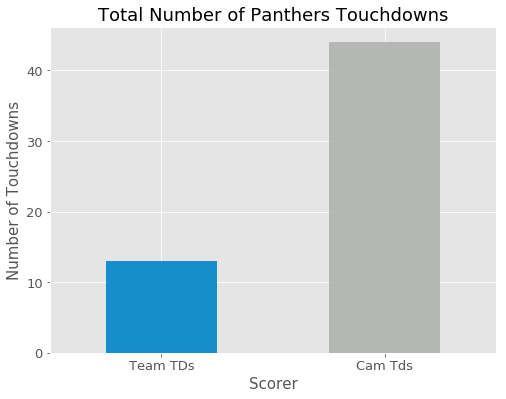

In [8]:
camtds = panthers_td.groupby('Cam').Touchdown.sum()

fig, ax = plt.subplots(figsize=(8,6), dpi = 72)


mycolors = ['#0085CA', '#b0b2b0'] # Set colors of bars to Panthers team colors

camtds.plot(kind='bar', alpha = 0.9, rot=0, color=mycolors,)# Plot bar graph
ax.set_title("Total Number of Panthers Touchdowns", fontsize = 18) # Chart title
ax.set_xlabel('Scorer', fontsize = 15) # X-axis label
ax.set_ylabel('Number of Touchdowns', fontsize = 15) # Y-axis label
plt.xticks([0, 1], ['Team TDs', 'Cam Tds'], fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

Quite an effect Cam Newton has on the Panthers due to his ability to being both a rusher and a passer. I am going to now calculate on average how many touchdowns Cam Newton scores per game.